In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics

In [2]:
#Reading csv file
data = pd.read_csv("https://raw.githubusercontent.com/navidharni/Machine-Learning/main/Dataset/heart.csv")

In [3]:
#Standardization Function
def standardize(arr):
    return[(value - arr.mean())/arr.std() for value in arr]

In [4]:
#Pre-processing
#One-Hot-Encoding
encd = pd.get_dummies(data['famhist'])
data = data.drop('famhist', 'columns')
data = data.join(encd)

train,test  = train_test_split(data,test_size=0.25)

#Extracting the features and target variables and standardizing features
x_train = train.iloc[:,np.r_[1:9,10,11]].copy()
y_train = train.iloc[:,9].copy()
for column in x_train.columns:
    x_train.loc[:,column] = standardize(x_train.loc[:,column])

x_test = test.iloc[:,np.r_[1:9,10,11]].copy()
y_test = test.iloc[:,9].copy()
for column in x_test.columns:
    x_test.loc[:,column] = standardize(x_test.loc[:,column])

In [5]:
# Classification and PCAs
logistic_regression = LogisticRegression().fit(x_train,y_train)
score = logistic_regression.score(x_test,y_test)
print(f'Accuracy (Logistic Regression) : {score*100}%')

# PCA with all the features
pca = PCA(n_components=10)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
logistic_regression2 = LogisticRegression().fit(x_train_pca,y_train)
score2 = logistic_regression2.score(x_test_pca,y_test)
print(f'Accuracy (Logistic Regression w/ PCs) : {score2*100}%')

z= pca.explained_variance_ratio_.cumsum()
for iter, i in enumerate(z):
    if i > 0.9:
        print(f"PCAs that explain more than 90% variation: {iter+1}")
        break
print(f"PCA variance explained by first two PCs: {round(z[1]*100,2)}%")

pca2= PCA(.90)
pca2.fit(x_train)
x_train_pca2 = pca2.transform(x_train)
x_test_pca2 = pca2.transform(x_test)
logistic_regression3 = LogisticRegression().fit(x_train_pca2,y_train)
score3 = logistic_regression3.score(x_test_pca2,y_test)
print(f'Accuracy (Logistic Regression w/ PCs = 7) : {score3*100}%')

Accuracy (Logistic Regression) : 66.37931034482759%
Accuracy (Logistic Regression w/ PCs) : 66.37931034482759%
PCAs that explain more than 90% variation: 7
PCA variance explained by first two PCs: 49.25%
Accuracy (Logistic Regression w/ PCs = 7) : 71.55172413793103%


C:\Users\navjo\venv\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


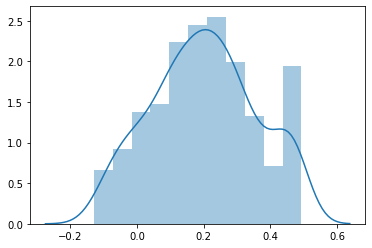

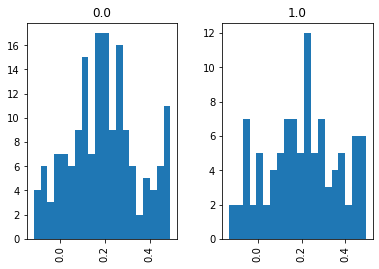

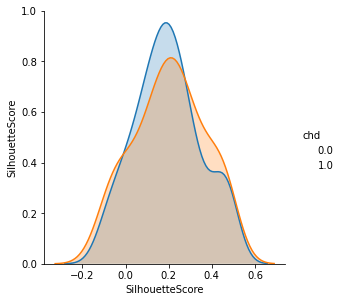

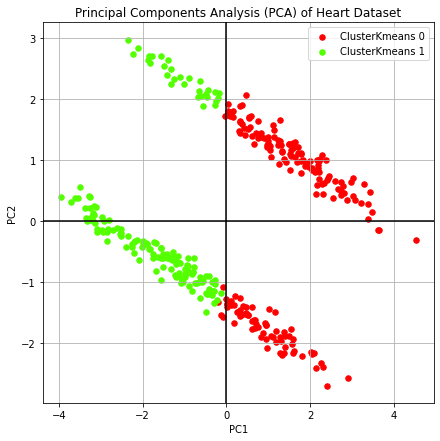

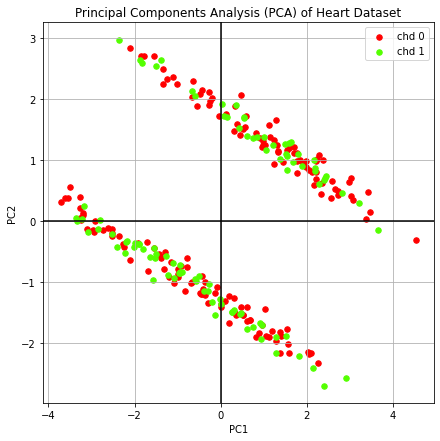

In [6]:
# K-Means
km = KMeans(n_clusters=2, random_state=0)
km.fit(x_train)
km_xtrain = km.predict(x_train)

# Visualizing the accuracy in our clustering
score4 = metrics.silhouette_score(x_train, km_xtrain)
scores = metrics.silhouette_samples(x_train, km_xtrain)
sns.distplot(scores)
df_scores = pd.DataFrame()
df_scores['SilhouetteScore'] = scores
df_scores['chd'] = y_train
df_scores.hist(by='chd', column='SilhouetteScore', bins=20)
sns.pairplot(df_scores, hue="chd", size=4)

# KMeans based on first two PCs
pc = PCA(n_components = 2)
pc.fit(x_train)
x_pca = pc.transform(x_train)
df_pca = pd.DataFrame(x_pca, columns=['PC1', 'PC2'])
df_pca['ClusterKmeans'] = km_xtrain
df_pca['chd'] = y_train

def plotData(df,groupby):
    fig, ax = plt.subplots(figsize = (7,7))

    # color map
    cmap = mpl.cm.get_cmap('prism')

    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
                     kind = 'scatter',
                     x = 'PC1', y = 'PC2',
                     color = cmap(i/1), # cmap maps a number to a color
                     label = "%s %i" % (groupby, i),
                     s=30) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA) of Heart Dataset");

#Plotting clusters with predicted labels
plotData(df_pca, 'ClusterKmeans')

#Plotting the actual labels
plotData(df_pca, 'chd')

